In [1]:
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import AveragePooling2D
from keras.applications import ResNet50

from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
import keras.optimizers

from keras.models import Sequential
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk import word_tokenize
from skimage.color import gray2rgb
import keras
import numpy as np
import argparse
import cv2
import os

Using TensorFlow backend.


In [2]:
#These are from question 2

#Obtain training dataset and testing dataset
X_train = np.load('../input/input/np_training_data.npy')
df_train=pd.read_csv('../input/input/facial_expression.csv')
emotions=df_train.emotion
y_train = np.array(emotions)
df_test = pd.read_csv('../input/input/test.csv')
#Convert X_test to a numpy ndarray so that it can be used for testing
pixels = df_test.loc[:,'pixels'].values
px = []
for x in pixels : 
    x = word_tokenize(x)
    x = [float(t) for t in x]
    px.append(x)
X_test = np.array(px)
#Convert Y_test
y_test = df_test.loc[:, 'emotion'].values
#Modify x_train to 2d
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (26859, 2304)
y_train (26859,)
X_test (1044, 2304)
y_test (1044,)


In [3]:
X_train = X_train.reshape((26859, 48, 48))
X_test = X_test.reshape((1044, 48, 48))
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (26859, 48, 48)
X_test (1044, 48, 48)


In [4]:
X_train_= gray2rgb(X_train)
X_test_ = gray2rgb(X_test)
print("X_train_", X_train_.shape)
print("X_test_", X_test_.shape)

X_train_ (26859, 48, 48, 3)
X_test_ (1044, 48, 48, 3)


In [5]:
X_train_ = X_train_.astype('float32')
X_test_ = X_test_.astype('float32')
X_train_ /= 255
X_test_ /= 255

In [6]:
print("X_train_", X_train_.shape)
print("y_train", y_train.shape)
print("X_test_", X_test_.shape)
print("y_test", y_test.shape)

X_train_ (26859, 48, 48, 3)
y_train (26859,)
X_test_ (1044, 48, 48, 3)
y_test (1044,)


In [7]:
# load ResNet50
ResNet50 = ResNet50(include_top=False, input_shape=(48, 48, 3), weights='imagenet')
print(ResNet50.summary())

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
__________________________

In [8]:
y_train = keras.utils.to_categorical(y_train, 7)
y_test = keras.utils.to_categorical(y_test, 7)

In [9]:
model = Sequential()
# model.add(Dense(256, input_shape=(256,), activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(7, activation='softmax'))

# construct on top of the base model
model = ResNet50.output
model = AveragePooling2D(pool_size=(1, 1))(model)
model = Flatten(name="flatten")(model)
model = Dense(256, input_shape=(256,), activation='relu')(model)
model = Dropout(0.5)(model)
model = Dense(7, activation="sigmoid")(model)

model = Model(inputs=ResNet50.input, outputs=model)

# from keras.optimizers import SGD
# opt = SGD(lr=0.0001, momentum=0.4)
model.compile(loss='categorical_crossentropy',
              optimizer="adam", metrics=['accuracy'])

model.fit(X_train_, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test_, y_test))


Train on 26859 samples, validate on 1044 samples
Epoch 1/12
26859/26859 [==============================] - 57s 2ms/step - loss: 1.4896 - accuracy: 0.4071 - val_loss: 1.7918 - val_accuracy: 0.1236
Epoch 2/12
26859/26859 [==============================] - 29s 1ms/step - loss: 1.2284 - accuracy: 0.5277 - val_loss: 5.6055 - val_accuracy: 0.1236
Epoch 3/12
26859/26859 [==============================] - 30s 1ms/step - loss: 1.1531 - accuracy: 0.5641 - val_loss: 1.8826 - val_accuracy: 0.1762
Epoch 4/12
26859/26859 [==============================] - 29s 1ms/step - loss: 1.1840 - accuracy: 0.5565 - val_loss: 1.4317 - val_accuracy: 0.4492
Epoch 5/12
26859/26859 [==============================] - 30s 1ms/step - loss: 1.0845 - accuracy: 0.5917 - val_loss: 1.1065 - val_accuracy: 0.5785
Epoch 6/12
26859/26859 [==============================] - 29s 1ms/step - loss: 1.1230 - accuracy: 0.5760 - val_loss: 1.0919 - val_accuracy: 0.5785
Epoch 7/12
26859/26859 [==============================] - 30s 1ms/ste

In [10]:
loss, accuracy = model.evaluate(X_test_, y_test)

1044/1044 [==============================] - 1s 831us/step


In [11]:
print("accuracy:", accuracy)

accuracy: 0.6120689511299133


In [12]:
#Convert y_test to single digits for making the confusion matrix
rounded_y_test=np.argmax(y_test, axis=1)
rounded_y_test[10]

0

In [13]:
#Confusion Matrix
predictions_resnet = model.predict(X_test_)
np.argmax(predictions_resnet[10])
y_pred_resnet = [np.argmax(predictions_resnet[num]) for num in range(len(y_test))]
confusion_resnet = confusion_matrix(rounded_y_test,y_pred_resnet) 

(6.0, 0.0)

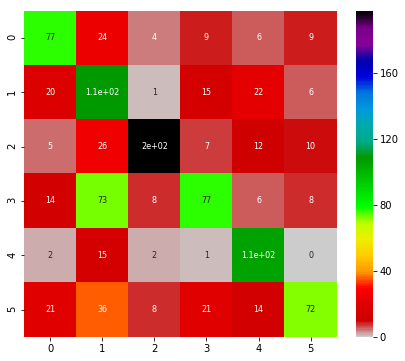

In [14]:
# Plot the confusion matrix
confusion_df_resnet = pd.DataFrame(confusion_resnet, range(6), range(6))
figure_resnet = plt.figure(figsize=(7,6))
axes_resnet = sns.heatmap(confusion_df_resnet, annot=True,annot_kws={"size": 8},
 cmap=plt.cm.nipy_spectral_r)
axes_resnet.set_ylim(sorted(axes_resnet.get_xlim(), reverse=True))

In [15]:
X_test_grey = X_test.reshape((1044, 48, 48, 1))

In [16]:
#Convert data format so that it can be plotted
images_resnet = X_test_grey.reshape((1044, 48, 48))
incorrect_predictions_resnet = []
#Find all the incorrect predictions by comparing with test data and predicted result
for i, (pred, expect) in enumerate(zip(predictions_resnet, rounded_y_test)):
    predicted, expected = np.argmax(pred), expect
    if predicted != expected:
        incorrect_predictions_resnet.append(
             (i, images_resnet[i], predicted, expected))

In [17]:
len(incorrect_predictions_resnet)

405

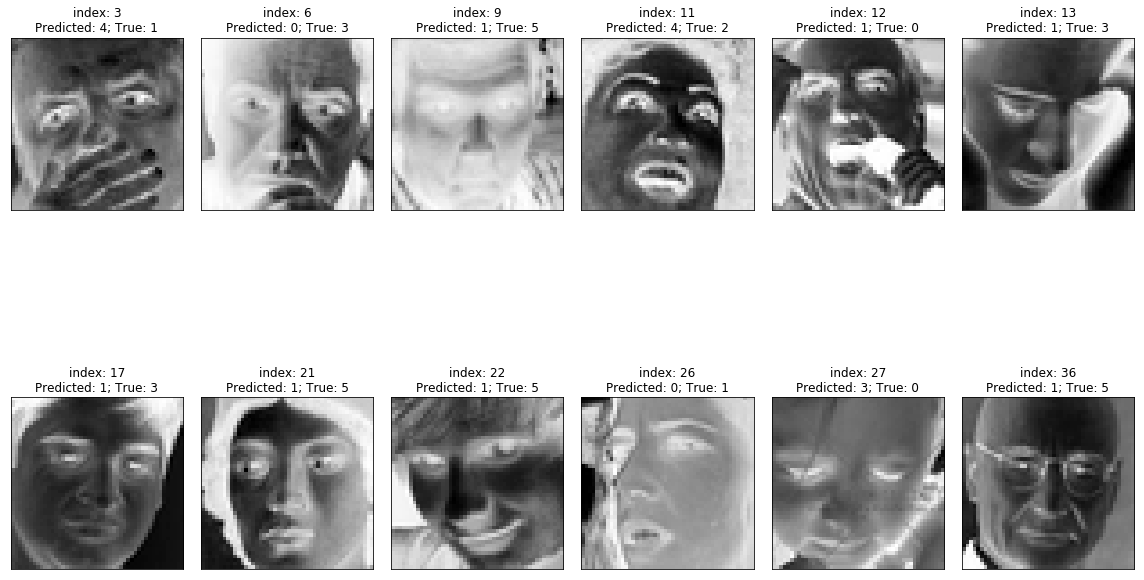

In [18]:
#Plot the first 12 incorrect predictions
figure, axes = plt.subplots(nrows=2, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions_resnet):
 index, image, predicted, expected = item
 axes.imshow(image, cmap=plt.cm.gray_r)
 axes.set_xticks([]) # remove x-axis tick marks
 axes.set_yticks([]) # remove y-axis tick marks
 axes.set_title(f'index: {index}\nPredicted: {predicted}; True: {expected}')
plt.tight_layout()

In [19]:
#This completes Q4 Part2